<font face="verdana"> 

# Exploratory Data Analysis for default prediction for Lending Club dataset
<br>
<br>

In this section we are going to:

<br>Understand dataset
<br>clean/impute missing values
<br>Dive into each attribute
<br>Record observations and create a clean data for model building



In [1]:
data_dir = 'C:/Users/Preeti/Github/Lending_Club/plots/'

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import warnings
#warnings.simplefilter('ignore',DeprecationWarning)
warnings.filterwarnings("ignore")

import seaborn as sns
import time
import copy
from datetime import datetime
from time import strftime


from pylab import rcParams
#import hdbscan

from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler

#from sklearn.datasets import make_blobs

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn import metrics
from sklearn import metrics as mt
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn.cluster import KMeans

from tabulate import tabulate

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from __future__ import print_function

In [75]:
master = pd.read_csv('loan.csv')
master.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
       'to

In [76]:
required_loan_status = ['Charged Off','Fully Paid']
df = master[master.loan_status.isin(required_loan_status)]

<font face="verdana"> 
  
  ### Understanding dataset
  <br>
  We will look at sample records, number of records, number of columns, if there are any duplicate records, identify categorical variables, identify numeric variables, range of values for numeric variables
    

In [77]:
df.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1070078,6500,6500,6500.0,60 months,14.65,153.45,C,C3,Southwest Rural metro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1069908,12000,12000,12000.0,36 months,12.69,402.54,B,B5,UCLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
from tabulate import tabulate
tabulate(print("\n1. Total number of records: ",df.shape[0],
               "\n2. Total number of columns: ",df.shape[1],
               "\n3. Column Names : ",df.columns,
               "\n4. Are there any duplicate records?", df.duplicated().any())
                         , tablefmt='textile')
print("\n******* Numerical attributes and their range *******")
df.describe().T


1. Total number of records:  252971 
2. Total number of columns:  70 
3. Column Names :  Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dt

''


******* Numerical attributes and their range *******


,count,mean,std,min,25%,50%,75%,max
id,252971.0,1.227348e+07,1.476158e+07,54734.00,1.458581e+06,6307391.00,1.646266e+07,6.860466e+07
loan_amnt,252971.0,1.356277e+04,8.131730e+03,500.00,7.200000e+03,12000.00,1.825000e+04,3.500000e+04
funded_amnt,252971.0,1.352219e+04,8.109211e+03,500.00,7.200000e+03,12000.00,1.807500e+04,3.500000e+04
funded_amnt_inv,252971.0,1.342917e+04,8.127683e+03,0.00,7.200000e+03,11975.00,1.800000e+04,3.500000e+04
int_rate,252971.0,1.376462e+01,4.401926e+00,5.32,1.074000e+01,13.53,1.655000e+01,2.899000e+01
installment,252971.0,4.181122e+02,2.449331e+02,15.69,2.395500e+02,365.23,5.475500e+02,1.424570e+03
annual_inc,252971.0,7.253825e+04,5.881181e+04,3000.00,4.500000e+04,62000.00,8.700000e+04,8.706582e+06
dti,252971.0,1.654410e+01,7.788696e+00,0.00,1.075000e+01,16.20,2.199000e+01,5.714000e+01
delinq_2yrs,252971.0,2.499140e-01,7.406002e-01,0.00,0.000000e+00,0.00,0.000000e+00,2.900000e+01
inq_last_6mths,252971.0,8.524851e-01,1.066875e+00,0.00,0.000000e+00,1.00,1.000000e+00,8.000000e+00


<br>
<br>
<br>
<font face="verdana"> 
Let us look at sample of each column in the dataset, Look at missing values in each columns and make our observations

In [79]:
col_names = df.columns
for col in col_names:
    print("Column Name: ",col)
    df[col].head()

Column Name:  id


0    1077501
1    1077430
2    1077175
3    1076863
5    1075269
Name: id, dtype: int64

Column Name:  loan_amnt


0     5000
1     2500
2     2400
3    10000
5     5000
Name: loan_amnt, dtype: int64

Column Name:  funded_amnt


0     5000
1     2500
2     2400
3    10000
5     5000
Name: funded_amnt, dtype: int64

Column Name:  funded_amnt_inv


0     4975.0
1     2500.0
2     2400.0
3    10000.0
5     5000.0
Name: funded_amnt_inv, dtype: float64

Column Name:  term


0     36 months
1     60 months
2     36 months
3     36 months
5     36 months
Name: term, dtype: object

Column Name:  int_rate


0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

Column Name:  installment


0    162.87
1     59.83
2     84.33
3    339.31
5    156.46
Name: installment, dtype: float64

Column Name:  grade


0    B
1    C
2    C
3    C
5    A
Name: grade, dtype: object

Column Name:  sub_grade


0    B2
1    C4
2    C5
3    C1
5    A4
Name: sub_grade, dtype: object

Column Name:  emp_title


0                     NaN
1                   Ryder
2                     NaN
3     AIR RESOURCES BOARD
5    Veolia Transportaton
Name: emp_title, dtype: object

Column Name:  emp_length


0    10+ years
1     < 1 year
2    10+ years
3    10+ years
5      3 years
Name: emp_length, dtype: object

Column Name:  home_ownership


0    RENT
1    RENT
2    RENT
3    RENT
5    RENT
Name: home_ownership, dtype: object

Column Name:  annual_inc


0    24000.0
1    30000.0
2    12252.0
3    49200.0
5    36000.0
Name: annual_inc, dtype: float64

Column Name:  verification_status


0           Verified
1    Source Verified
2       Not Verified
3    Source Verified
5    Source Verified
Name: verification_status, dtype: object

Column Name:  issue_d


0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

Column Name:  loan_status


0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
5     Fully Paid
Name: loan_status, dtype: object

Column Name:  pymnt_plan


0    n
1    n
2    n
3    n
5    n
Name: pymnt_plan, dtype: object

Column Name:  purpose


0       credit_card
1               car
2    small_business
3             other
5           wedding
Name: purpose, dtype: object

Column Name:  title


0                                 Computer
1                                     bike
2                     real estate business
3                                 personel
5    My wedding loan I promise to pay back
Name: title, dtype: object

Column Name:  addr_state


0    AZ
1    GA
2    IL
3    CA
5    AZ
Name: addr_state, dtype: object

Column Name:  dti


0    27.65
1     1.00
2     8.72
3    20.00
5    11.20
Name: dti, dtype: float64

Column Name:  delinq_2yrs


0    0.0
1    0.0
2    0.0
3    0.0
5    0.0
Name: delinq_2yrs, dtype: float64

Column Name:  earliest_cr_line


0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
5    Nov-04
Name: earliest_cr_line, dtype: object

Column Name:  inq_last_6mths


0    1.0
1    5.0
2    2.0
3    1.0
5    3.0
Name: inq_last_6mths, dtype: float64

Column Name:  mths_since_last_delinq


0     NaN
1     NaN
2     NaN
3    35.0
5     NaN
Name: mths_since_last_delinq, dtype: float64

Column Name:  mths_since_last_record


0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: mths_since_last_record, dtype: float64

Column Name:  open_acc


0     3.0
1     3.0
2     2.0
3    10.0
5     9.0
Name: open_acc, dtype: float64

Column Name:  pub_rec


0    0.0
1    0.0
2    0.0
3    0.0
5    0.0
Name: pub_rec, dtype: float64

Column Name:  revol_bal


0    13648
1     1687
2     2956
3     5598
5     7963
Name: revol_bal, dtype: int64

Column Name:  revol_util


0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

Column Name:  total_acc


0     9.0
1     4.0
2    10.0
3    37.0
5    12.0
Name: total_acc, dtype: float64

Column Name:  initial_list_status


0    f
1    f
2    f
3    f
5    f
Name: initial_list_status, dtype: object

Column Name:  out_prncp


0    0.0
1    0.0
2    0.0
3    0.0
5    0.0
Name: out_prncp, dtype: float64

Column Name:  out_prncp_inv


0    0.0
1    0.0
2    0.0
3    0.0
5    0.0
Name: out_prncp_inv, dtype: float64

Column Name:  total_pymnt


0     5861.071414
1     1008.710000
2     3003.653644
3    12226.302210
5     5631.377753
Name: total_pymnt, dtype: float64

Column Name:  total_pymnt_inv


0     5831.78
1     1008.71
2     3003.65
3    12226.30
5     5631.38
Name: total_pymnt_inv, dtype: float64

Column Name:  total_rec_prncp


0     5000.00
1      456.46
2     2400.00
3    10000.00
5     5000.00
Name: total_rec_prncp, dtype: float64

Column Name:  total_rec_int


0     861.07
1     435.17
2     603.65
3    2209.33
5     631.38
Name: total_rec_int, dtype: float64

Column Name:  total_rec_late_fee


0     0.00
1     0.00
2     0.00
3    16.97
5     0.00
Name: total_rec_late_fee, dtype: float64

Column Name:  recoveries


0      0.00
1    117.08
2      0.00
3      0.00
5      0.00
Name: recoveries, dtype: float64

Column Name:  collection_recovery_fee


0    0.00
1    1.11
2    0.00
3    0.00
5    0.00
Name: collection_recovery_fee, dtype: float64

Column Name:  last_pymnt_d


0    Jan-15
1    Apr-13
2    Jun-14
3    Jan-15
5    Jan-15
Name: last_pymnt_d, dtype: object

Column Name:  last_pymnt_amnt


0    171.62
1    119.66
2    649.91
3    357.48
5    161.03
Name: last_pymnt_amnt, dtype: float64

Column Name:  next_pymnt_d


0    NaN
1    NaN
2    NaN
3    NaN
5    NaN
Name: next_pymnt_d, dtype: object

Column Name:  last_credit_pull_d


0    Jan-16
1    Sep-13
2    Jan-16
3    Jan-15
5    Sep-15
Name: last_credit_pull_d, dtype: object

Column Name:  collections_12_mths_ex_med


0    0.0
1    0.0
2    0.0
3    0.0
5    0.0
Name: collections_12_mths_ex_med, dtype: float64

Column Name:  mths_since_last_major_derog


0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: mths_since_last_major_derog, dtype: float64

Column Name:  policy_code


0    1
1    1
2    1
3    1
5    1
Name: policy_code, dtype: int64

Column Name:  application_type


0    INDIVIDUAL
1    INDIVIDUAL
2    INDIVIDUAL
3    INDIVIDUAL
5    INDIVIDUAL
Name: application_type, dtype: object

Column Name:  annual_inc_joint


0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: annual_inc_joint, dtype: float64

Column Name:  dti_joint


0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: dti_joint, dtype: float64

Column Name:  verification_status_joint


0    NaN
1    NaN
2    NaN
3    NaN
5    NaN
Name: verification_status_joint, dtype: object

Column Name:  acc_now_delinq


0    0.0
1    0.0
2    0.0
3    0.0
5    0.0
Name: acc_now_delinq, dtype: float64

Column Name:  tot_coll_amt


0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: tot_coll_amt, dtype: float64

Column Name:  tot_cur_bal


0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: tot_cur_bal, dtype: float64

Column Name:  open_acc_6m


0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: open_acc_6m, dtype: float64

Column Name:  open_il_6m


0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: open_il_6m, dtype: float64

Column Name:  open_il_12m


0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: open_il_12m, dtype: float64

Column Name:  open_il_24m


0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: open_il_24m, dtype: float64

Column Name:  mths_since_rcnt_il


0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: mths_since_rcnt_il, dtype: float64

Column Name:  total_bal_il


0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: total_bal_il, dtype: float64

Column Name:  il_util


0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: il_util, dtype: float64

Column Name:  open_rv_12m


0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: open_rv_12m, dtype: float64

Column Name:  open_rv_24m


0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: open_rv_24m, dtype: float64

Column Name:  max_bal_bc


0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: max_bal_bc, dtype: float64

Column Name:  all_util


0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: all_util, dtype: float64

Column Name:  total_rev_hi_lim


0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: total_rev_hi_lim, dtype: float64

Column Name:  inq_fi


0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: inq_fi, dtype: float64

Column Name:  total_cu_tl


0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: total_cu_tl, dtype: float64

Column Name:  inq_last_12m


0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: inq_last_12m, dtype: float64

In [80]:
for col in df.columns:
    if df[col].isnull().sum() > 0.0:
        print("#Missing values in ",col,": ",df[col].isnull().sum(),",  % missing :" ,round((df[col].isnull().sum()/df.shape[0])*100, 4))
        #print("% of missing value in ",col," ",round((df[col].isnull().sum()/df.shape[0])*100, 2))

#Missing values in  emp_title :  13928 ,  % missing : 5.5058
#Missing values in  title :  12 ,  % missing : 0.0047
#Missing values in  mths_since_last_delinq :  140820 ,  % missing : 55.6665
#Missing values in  mths_since_last_record :  221373 ,  % missing : 87.5092
#Missing values in  revol_util :  199 ,  % missing : 0.0787
#Missing values in  last_pymnt_d :  527 ,  % missing : 0.2083
#Missing values in  next_pymnt_d :  252971 ,  % missing : 100.0
#Missing values in  last_credit_pull_d :  21 ,  % missing : 0.0083
#Missing values in  collections_12_mths_ex_med :  56 ,  % missing : 0.0221
#Missing values in  mths_since_last_major_derog :  205426 ,  % missing : 81.2054
#Missing values in  annual_inc_joint :  252970 ,  % missing : 99.9996
#Missing values in  dti_joint :  252970 ,  % missing : 99.9996
#Missing values in  verification_status_joint :  252970 ,  % missing : 99.9996
#Missing values in  tot_coll_amt :  63708 ,  % missing : 25.1839
#Missing values in  tot_cur_bal :  63708 ,  % m

<font face="verdana"> 

###  Correlation Matrix

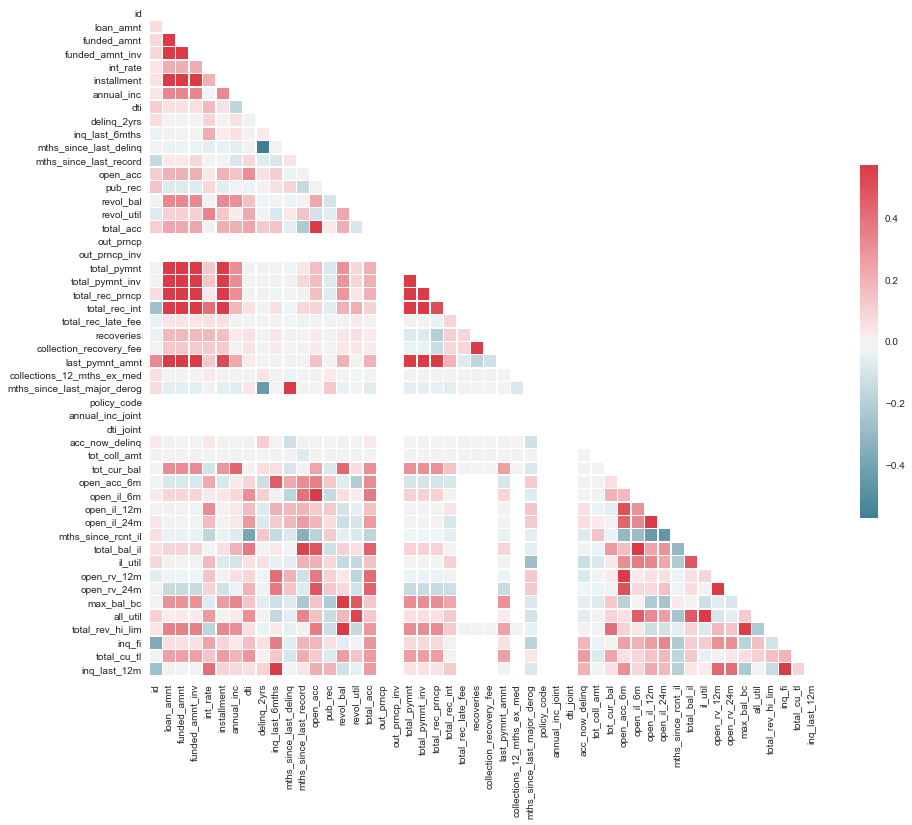

In [60]:
# Compute the correlation matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#save plots for later use
plot_type = "Correlation_"
plot_name = "Matrix"
data_file_ext = ".png"
plt_file_2_save = data_dir + plot_type + plot_name + data_file_ext
plt.savefig(plt_file_2_save)
    
plt.show()

In [113]:
corr[corr['loan_amnt'] > 0.6]['loan_amnt']

loan_amnt      1.000000
total_pymnt    0.843196
Name: loan_amnt, dtype: float64

In [82]:
corr[corr['total_pymnt'] > 0.6]['total_pymnt']

loan_amnt          0.843196
funded_amnt        0.844655
funded_amnt_inv    0.840461
installment        0.821205
total_pymnt        1.000000
total_pymnt_inv    0.995738
total_rec_prncp    0.975571
total_rec_int      0.680353
last_pymnt_amnt    0.694664
Name: total_pymnt, dtype: float64

In [83]:
corr[corr['recoveries'] > 0.6]['recoveries']

recoveries                 1.000000
collection_recovery_fee    0.799897
Name: recoveries, dtype: float64

<font face="verdana"> 
  
  ### Observations and next steps:

<br>1. Column <b>Term</b> is categorical because of the usuage "month". It would be good to convert it to numeric as values 36, 60 have different weightage.
<br>2. <b>emp_length</b> impute 'n/a' to '0 year'. 
<br>3. <b>revol_util</b> has %. This needs to be removed and column has to be converted to numeric.
<br>4. <b>issue_d</b> does not provide year of issue. This column would be incorrect to use. We can drop the column.
<br>5. <b>earliest_cr_line</b> has year value, that would be useful in model building. We can remove the month and keep the year by cleaning it up to 4 numbers.
<br>
<br>
<br>
Missing values and imputing:
<br>1. <b>mths_since_last_delinq</b> has missing values. These are never delinquent records, we can mark NANs to 0.
<br>2. <b>mths_since_last_record</b> has too many missing values. We will mark NANs to 0 and observe the data.
<br>3. <b>dti</b> is missing 2 values. We can impute mean values.
<br>4. <b>delinq_2yrs,pub_rec_bankruptcies,pub_rec,inq_last_6mths,collections_12_mths_ex_med,tot_coll_amt</b> We will mark NANs to 0. For collections we are going with the assumtion that there no amount to be collected and imputing mean value might cause inconsistency with policies with low loan amount.
<br>open_acc and total_acc, The number of open credit lines in the borrower's credit file. These are missing #s but we can impute these values to 1, as borrower has to have atleast one credit line to get the loan.  We will mark NANs to 1.
<br>10.<b>revol_util</b> these are missing values. We will impute mean values.
<br>11.<b>annual_inc</b> these are missing values. We will impute mean values.
<br>   <b>emp_title</b> would be insteresting to anlyze, we will impute missing values to a new category 'Others'

highly correlated columns
<br>1.<b>funded_amnt,funded_amnt_inv,installment,out_prncp,out_prncp_inv</b> are higly correlated with loan amount, we will drop this column.
<br>2. <b>total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt</b> are higly correlated with total_pymnt, we will drop this column.
<br>2. <b>collection_recovery_fee</b> is higly correlated with recoveries, we will drop this column.

<br>
<br>
<br> The following are missing more than 80% of the data, Hence we are dropping these columns:
<br>-mths_since_last_record
<br>-open_il_6m
<br>-open_il_12m
<br>-open_il_24m
<br>-mths_since_rcnt_il
<br>-total_bal_il 
<br>-il_util 
<br>-open_rv_12m 
<br>-open_rv_24m
<br>-max_bal_bc
<br>-all_util
<br>-annual_inc_joint
<br>-dti_joint
<br>-inq_fi
<br>-total_cu_tl
<br>-inq_last_12m
<br>-verification_status_joint
<br>-mths_since_last_major_derog

<br>Note: All numeric values after imputing will have to recasted to type numeric.

The above observations are going to be executed step-by-step to complete data cleaning.

In [84]:
cols_with_high_correlation = ['collection_recovery_fee','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt','out_prncp_inv','out_prncp','funded_amnt','funded_amnt_inv','installment','next_pymnt_d']
for col in cols_with_high_correlation:
    del df[col]

In [85]:
# 11 fill emp_title with others
df['emp_title'].fillna('Others',inplace=True)
df['emp_title'].unique()
df['emp_title'].isnull().any()

array(['Others', 'Ryder', 'AIR RESOURCES BOARD', ...,
       'Asst. General Superintendent ', 'Gunnery Sgt Instructor',
       'Coordinator of RSVP'], dtype=object)

False

In [86]:
#1.  Loan term has been converted to numeric and stored in the different attribute n_term
df['term'] = df['term'].str.strip()
df['term'].unique()
df['n_term'] = np.where(df['term']=='36 months', 36, 60)
df['n_term'].unique()

array(['36 months', '60 months'], dtype=object)

array([36, 60], dtype=int64)

In [87]:
# 2. <b>emp_length</b> impute 'n/a' to '0 year'. 
df['emp_length'].replace('n/a','0 years',inplace=True)
df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years',
       '0 years'], dtype=object)

In [88]:
#3.  fill up missing values for mths_since_last_delinq with 0
df['mths_since_last_delinq'].fillna(0, inplace=True)
df['mths_since_last_delinq'].head(10)

0      0.0
1      0.0
2      0.0
3     35.0
5      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
Name: mths_since_last_delinq, dtype: float64

In [89]:
#4. <b>mths_since_last_record</b> has too many missing values. We will mark NANs to 0 and observe the data.
df['mths_since_last_record'].fillna(0, inplace=True)
df['mths_since_last_record'].head(10)

0     0.0
1     0.0
2     0.0
3     0.0
5     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
Name: mths_since_last_record, dtype: float64

In [90]:
# 5.revol_util has %. This needs to be removed and column has to be converted to numeric.
#10.revol_util these are missing values. We will impute mean values.
#df['revol_util'] = df['revol_util'].str.replace('%','')
# fill missing value with mean values
df['revol_util'].fillna(value=df['revol_util'].mean(),inplace=True)
df['revol_util'] = df['revol_util'].astype(float)
df['revol_util'].isnull().any()

False

In [91]:
#<br>8. <b>dti</b> is missing 2 values. We can impute mean values.
df['dti'].fillna(value=df['dti'].mean(),inplace=True)
df['dti'].isnull().any()

False

In [93]:
# 7. 
df['earliest_cr_line_year'] = df.earliest_cr_line.str.split('-').str[1]
df['earliest_cr_line_year'].isnull().sum()
df['earliest_cr_line_year'] = df['earliest_cr_line_year'].astype(str)

0

In [94]:
#df['earliest_cr_line_year'] = df['earliest_cr_line_year'].astype(float)
#df['earliest_cr_line_year'].fillna(value=df['earliest_cr_line_year'].mean(),inplace=True)
#df['earliest_cr_line_year'].isnull().sum()
#df['earliest_cr_line_year'] = df['earliest_cr_line_year'].astype(str)

In [95]:
df['annual_inc'].fillna(value=df['annual_inc'].mean(),inplace=True)
df['annual_inc'] = df['annual_inc'].astype(float)
df['annual_inc'].isnull().any()

False

In [96]:
#9. <b>delinq_2yrs,pub_rec_bankruptcies,open_acc,pub_rec,total_acc</b> We will mark NANs to 0.
cols_NAN_to_0=['delinq_2yrs','inq_last_6mths','open_acc','pub_rec','total_acc','collections_12_mths_ex_med','tot_coll_amt' ]
for col in cols_NAN_to_0:
    df[col].fillna(0,inplace=True)
    df[col] = df[col].astype(float)
    print("Is ",col," missing values?",df[col].isnull().any())

Is  delinq_2yrs  missing values? False
Is  inq_last_6mths  missing values? False
Is  open_acc  missing values? False
Is  pub_rec  missing values? False
Is  total_acc  missing values? False
Is  collections_12_mths_ex_med  missing values? False
Is  tot_coll_amt  missing values? False


In [97]:
# delet columns with more than 80% missing values
del df['issue_d']
del df['earliest_cr_line']
del df['mths_since_last_record']
del df['open_il_6m']
del df['open_il_12m']
del df['open_il_24m']
del df['mths_since_rcnt_il']
del df['total_bal_il']
del df['il_util']
del df['open_rv_12m'] 
del df['open_rv_24m']
del df['max_bal_bc']
del df['all_util']
del df['annual_inc_joint']
del df['dti_joint']
del df['inq_fi']
del df['total_cu_tl']
del df['inq_last_12m']
del df['verification_status_joint']
del df['mths_since_last_major_derog']
del df['acc_now_delinq']

In [98]:
del df['tot_cur_bal']

In [99]:
for col in df.columns:
    if df[col].isnull().sum() > 0.0:
        print("#Missing values in ",col,": ",df[col].isnull().sum(),",  % missing :" ,round((df[col].isnull().sum()/df.shape[0])*100, 4))
        #print("% of missing value in ",col," ",round((df[col].isnull().sum()/df.shape[0])*100, 2))

#Missing values in  title :  12 ,  % missing : 0.0047
#Missing values in  last_pymnt_d :  527 ,  % missing : 0.2083
#Missing values in  last_credit_pull_d :  21 ,  % missing : 0.0083
#Missing values in  open_acc_6m :  252827 ,  % missing : 99.9431
#Missing values in  total_rev_hi_lim :  63708 ,  % missing : 25.1839


In [101]:
df['last_pymnt_d'].unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'Apr-12', 'Nov-12', 'Jun-13',
       'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15', 'Aug-15',
       'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13', 'Nov-13',
       'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12', 'Jul-14',
       'Jul-13', 'Jan-16', 'Apr-15', 'Feb-14', 'Sep-14', 'Jun-12',
       'Feb-13', 'Mar-13', 'May-14', 'Mar-15', 'Jan-13', 'Dec-13',
       'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15', 'Jan-12', 'Oct-15',
       'Nov-14', 'Mar-12', 'May-12', 'Dec-15', 'Jun-15', 'May-15',
       'Jul-15', 'Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10',
       'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09',
       'Jul-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09',
       'Jan-09', 'Dec-08', 'Oct-08', 'Aug-08', 'Jul-08', 

Latest month is 'Jan-15', We will impute missin last payment date .2% data with 'Jan-15', assuming it was paid up until then

In [103]:
df['last_pymnt_d'].fillna( 'Jan-15',inplace=True)

In [104]:
df[['emp_title','purpose']].head()

,emp_title,purpose
0,Others,credit_card
1,Ryder,car
2,Others,small_business
3,AIR RESOURCES BOARD,other
5,Veolia Transportaton,wedding


In [105]:
df[['title','purpose']].head()

,title,purpose
0,Computer,credit_card
1,bike,car
2,real estate business,small_business
3,personel,other
5,My wedding loan I promise to pay back,wedding


In [106]:
del df['open_acc_6m']
del df['title']
del df['last_credit_pull_d']
del df['total_rev_hi_lim']

In [107]:
del df['policy_code']

In [108]:
df_numeric = df.select_dtypes(['number'])
numeric_col_names = df_numeric.columns.values.tolist()
numeric_col_names.remove('id')
numeric_col_names

['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_rec_late_fee',
 'recoveries',
 'collections_12_mths_ex_med',
 'tot_coll_amt',
 'n_term']

In [109]:
for col in numeric_col_names:
    if df[col].isnull().sum() > 0.0:
        print("#Missing values in ",col,": ",df[col].isnull().sum(),",  % missing :" ,round((df[col].isnull().sum()/df.shape[0])*100, 4))
        #print("% of missing value in ",col," ",round((df[col].isnull().sum()/df.shape[0])*100, 2))

loan_amnt


(array([17985., 45790., 52062., 35613., 31530., 28740., 12287., 12401.,
         6339., 10224.]),
 array([  500.,  3950.,  7400., 10850., 14300., 17750., 21200., 24650.,
        28100., 31550., 35000.]),
 <a list of 10 Patch objects>)

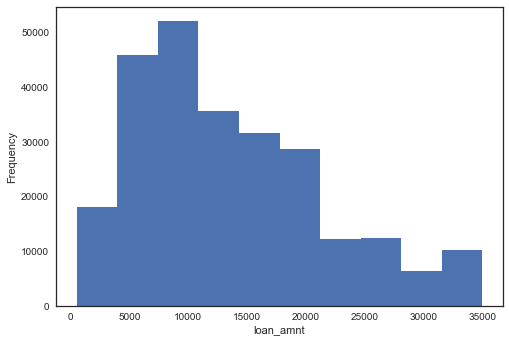

int_rate


(array([22342., 31501., 46994., 56141., 39862., 31720., 11843.,  8694.,
         3780.,    94.]),
 array([ 5.32 ,  7.687, 10.054, 12.421, 14.788, 17.155, 19.522, 21.889,
        24.256, 26.623, 28.99 ]),
 <a list of 10 Patch objects>)

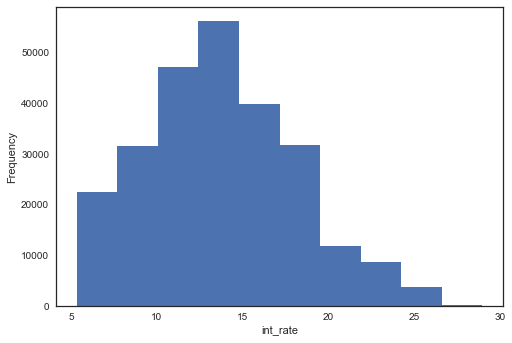

annual_inc


(array([2.52909e+05, 4.70000e+01, 7.00000e+00, 0.00000e+00, 1.00000e+00,
        2.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([3.0000000e+03, 8.7335820e+05, 1.7437164e+06, 2.6140746e+06,
        3.4844328e+06, 4.3547910e+06, 5.2251492e+06, 6.0955074e+06,
        6.9658656e+06, 7.8362238e+06, 8.7065820e+06]),
 <a list of 10 Patch objects>)

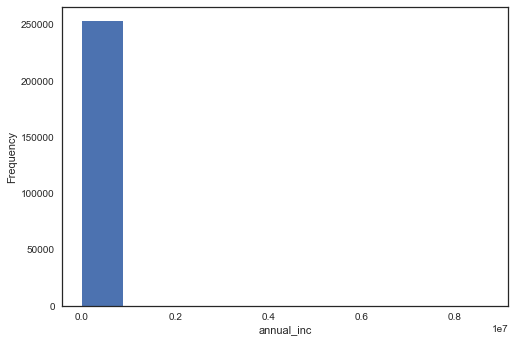

dti


(array([2.0750e+04, 4.9830e+04, 6.7031e+04, 5.9997e+04, 3.6758e+04,
        1.6009e+04, 2.5950e+03, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  5.714, 11.428, 17.142, 22.856, 28.57 , 34.284, 39.998,
        45.712, 51.426, 57.14 ]),
 <a list of 10 Patch objects>)

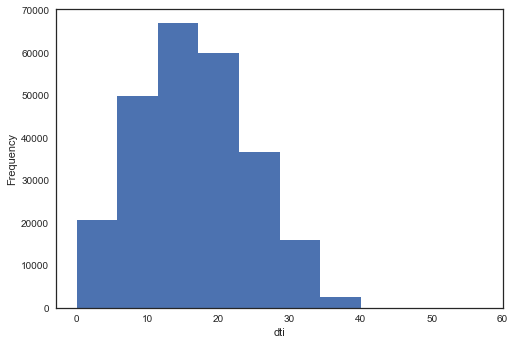

delinq_2yrs


(array([2.48177e+05, 4.15300e+03, 4.90000e+02, 1.00000e+02, 3.60000e+01,
        8.00000e+00, 5.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <a list of 10 Patch objects>)

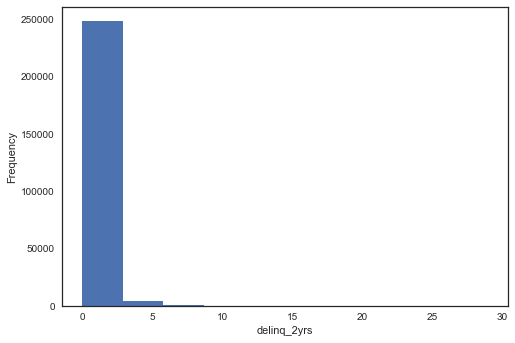

inq_last_6mths


(array([1.23762e+05, 7.27350e+04, 3.47680e+04, 1.60590e+04, 0.00000e+00,
        3.69200e+03, 1.37400e+03, 5.17000e+02, 4.60000e+01, 1.80000e+01]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

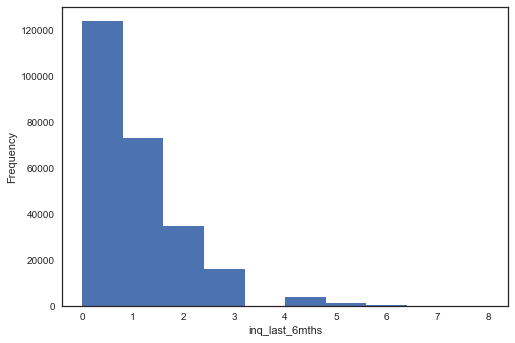

mths_since_last_delinq


(array([1.66558e+05, 2.72670e+04, 2.39170e+04, 1.67490e+04, 1.35020e+04,
        4.91200e+03, 3.80000e+01, 1.30000e+01, 9.00000e+00, 6.00000e+00]),
 array([  0. ,  15.2,  30.4,  45.6,  60.8,  76. ,  91.2, 106.4, 121.6,
        136.8, 152. ]),
 <a list of 10 Patch objects>)

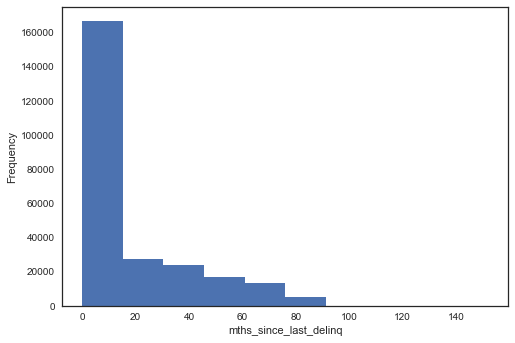

open_acc


(array([6.37800e+04, 1.49198e+05, 3.35710e+04, 5.61200e+03, 6.52000e+02,
        1.28000e+02, 2.50000e+01, 4.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0. ,  7.6, 15.2, 22.8, 30.4, 38. , 45.6, 53.2, 60.8, 68.4, 76. ]),
 <a list of 10 Patch objects>)

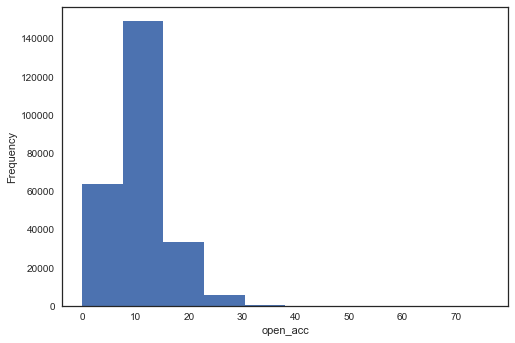

pub_rec


(array([2.49375e+05, 2.54700e+03, 8.78000e+02, 9.20000e+01, 5.80000e+01,
        8.00000e+00, 1.00000e+01, 1.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

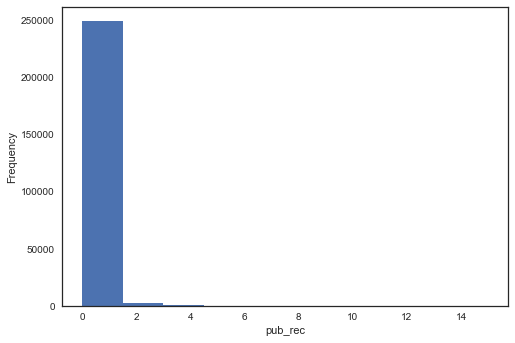

revol_bal


(array([2.52585e+05, 3.31000e+02, 3.70000e+01, 1.40000e+01, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([      0. ,  174671.6,  349343.2,  524014.8,  698686.4,  873358. ,
        1048029.6, 1222701.2, 1397372.8, 1572044.4, 1746716. ]),
 <a list of 10 Patch objects>)

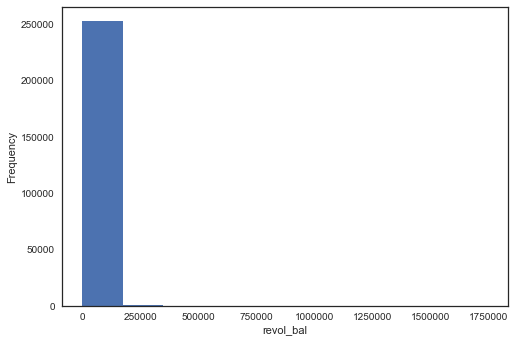

revol_util


(array([2.33677e+05, 1.92930e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0.  ,  89.23, 178.46, 267.69, 356.92, 446.15, 535.38, 624.61,
        713.84, 803.07, 892.3 ]),
 <a list of 10 Patch objects>)

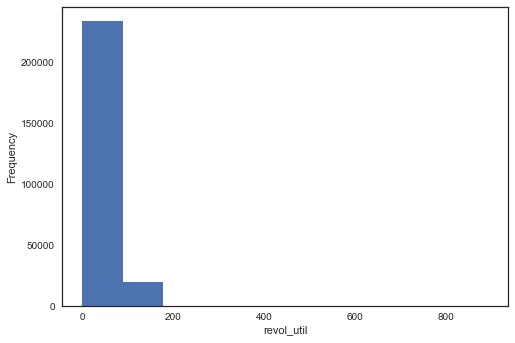

total_acc


(array([6.41170e+04, 1.23285e+05, 5.23010e+04, 1.13990e+04, 1.69000e+03,
        1.49000e+02, 2.60000e+01, 3.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  2. ,  16.8,  31.6,  46.4,  61.2,  76. ,  90.8, 105.6, 120.4,
        135.2, 150. ]),
 <a list of 10 Patch objects>)

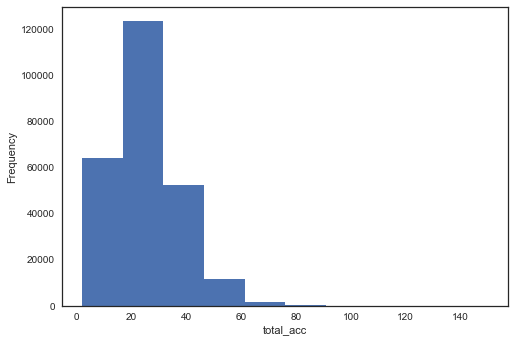

total_pymnt


(array([54737., 72925., 53848., 31922., 18942.,  9935.,  7081.,  2886.,
          613.,    82.]),
 array([    0.      ,  5777.757987, 11555.515974, 17333.273961,
        23111.031948, 28888.789935, 34666.547922, 40444.305909,
        46222.063896, 51999.821883, 57777.57987 ]),
 <a list of 10 Patch objects>)

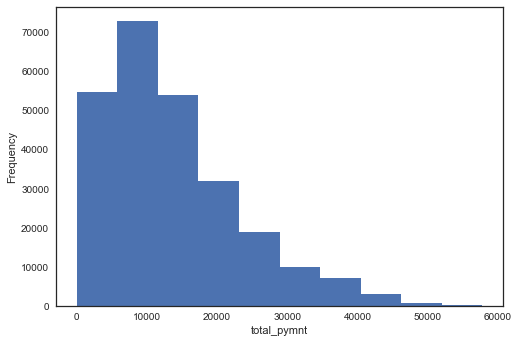

total_rec_late_fee


(array([2.51623e+05, 1.12700e+03, 1.62000e+02, 4.50000e+01, 7.00000e+00,
        3.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([  0.   ,  35.868,  71.736, 107.604, 143.472, 179.34 , 215.208,
        251.076, 286.944, 322.812, 358.68 ]),
 <a list of 10 Patch objects>)

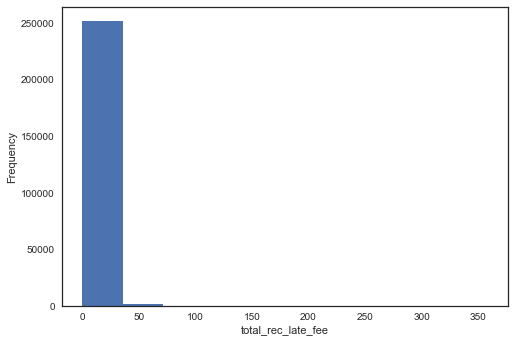

recoveries


(array([2.49844e+05, 2.75600e+03, 2.36000e+02, 7.20000e+01, 3.10000e+01,
        1.30000e+01, 1.10000e+01, 4.00000e+00, 2.00000e+00, 2.00000e+00]),
 array([    0.   ,  3352.027,  6704.054, 10056.081, 13408.108, 16760.135,
        20112.162, 23464.189, 26816.216, 30168.243, 33520.27 ]),
 <a list of 10 Patch objects>)

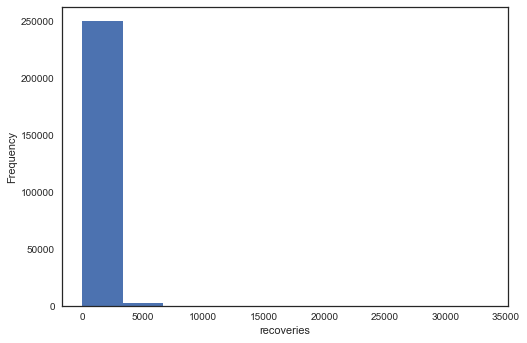

collections_12_mths_ex_med


(array([2.51397e+05, 1.46600e+03, 0.00000e+00, 9.60000e+01, 0.00000e+00,
        8.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

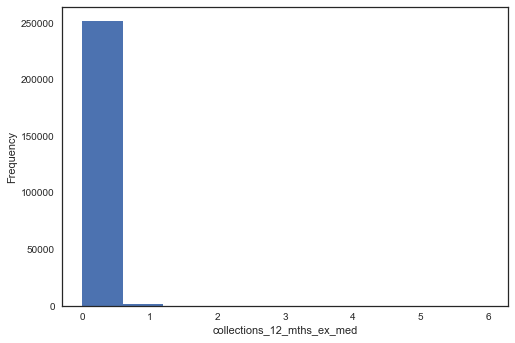

tot_coll_amt


(array([2.5297e+05, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([      0. ,  915254.5, 1830509. , 2745763.5, 3661018. , 4576272.5,
        5491527. , 6406781.5, 7322036. , 8237290.5, 9152545. ]),
 <a list of 10 Patch objects>)

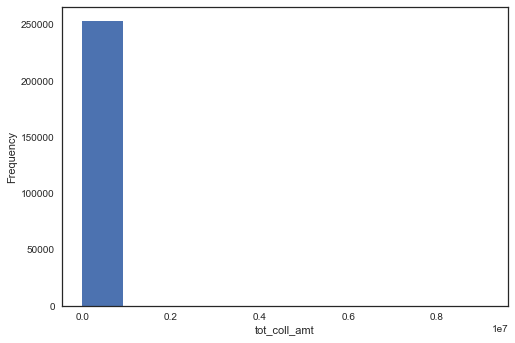

n_term


(array([196658.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  56313.]),
 array([36. , 38.4, 40.8, 43.2, 45.6, 48. , 50.4, 52.8, 55.2, 57.6, 60. ]),
 <a list of 10 Patch objects>)

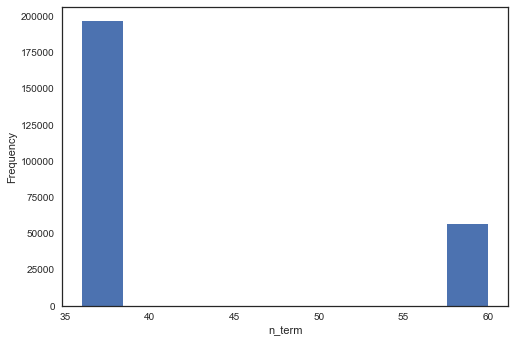

In [110]:
for col in numeric_col_names:
    print(col)
    plt.hist(df[col], bins = 10)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    #save plots for later use
    plot_type = "Frequency_"
    plot_name = str(col)
    data_file_ext = ".png"
    plt_file_2_save = data_dir + plot_type + plot_name + data_file_ext
    plt.savefig(plt_file_2_save)
    
    #plt.title("Frequency distribution of ",col)
    plt.show()

loan_amnt


(array([8.0000e+00, 9.9600e+02, 2.1780e+03, 5.7450e+03, 1.3391e+04,
        3.0248e+04, 3.9374e+04, 6.2951e+04, 6.1341e+04, 3.6739e+04]),
 array([ 6.2166061 ,  6.64125868,  7.06591126,  7.49056384,  7.91521643,
         8.33986901,  8.76452159,  9.18917417,  9.61382675, 10.03847933,
        10.46313191]),
 <a list of 10 Patch objects>)

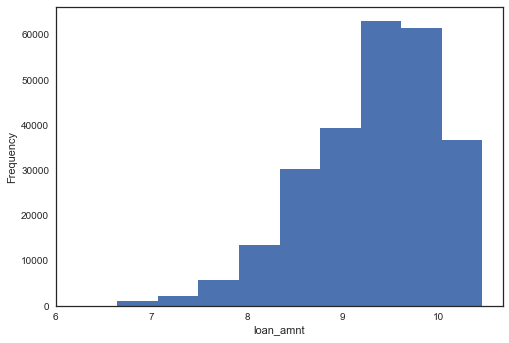

int_rate


(array([ 6977., 14994., 21069., 21260., 42215., 54605., 47205., 27089.,
        14618.,  2939.]),
 array([1.84371921, 1.99943369, 2.15514817, 2.31086264, 2.46657712,
        2.6222916 , 2.77800608, 2.93372056, 3.08943504, 3.24514951,
        3.40086399]),
 <a list of 10 Patch objects>)

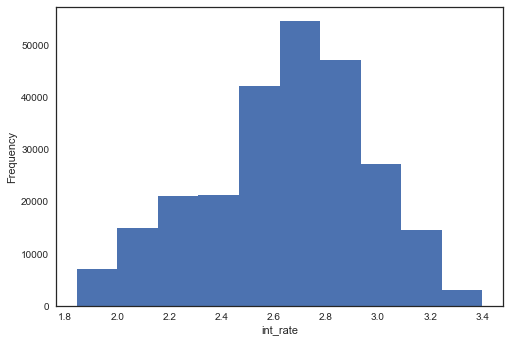

annual_inc


(array([2.40000e+01, 1.08200e+03, 2.26110e+04, 1.33901e+05, 8.67290e+04,
        7.96900e+03, 5.70000e+02, 7.00000e+01, 8.00000e+00, 7.00000e+00]),
 array([ 8.00670085,  8.80398976,  9.60127867, 10.39856758, 11.19585649,
        11.9931454 , 12.79043432, 13.58772323, 14.38501214, 15.18230105,
        15.97958996]),
 <a list of 10 Patch objects>)

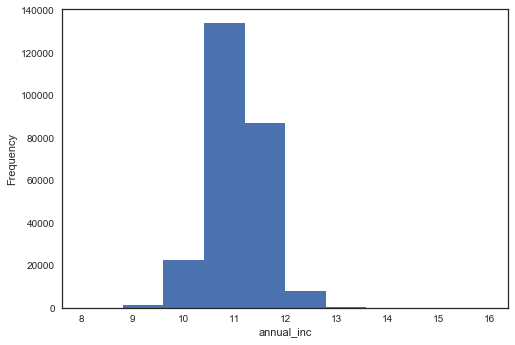

dti


(array([  966.,  1583.,  2935.,  6361., 14805., 33341., 66306., 87426.,
        38658.,   590.]),
 array([0.        , 0.40628539, 0.81257078, 1.21885617, 1.62514156,
        2.03142695, 2.43771234, 2.84399773, 3.25028312, 3.65656851,
        4.0628539 ]),
 <a list of 10 Patch objects>)

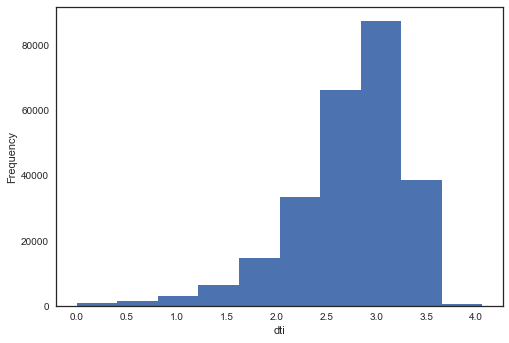

delinq_2yrs


(array([2.12239e+05, 0.00000e+00, 2.81790e+04, 7.75900e+03, 3.61200e+03,
        8.04000e+02, 2.77000e+02, 8.60000e+01, 1.30000e+01, 2.00000e+00]),
 array([0.        , 0.34011974, 0.68023948, 1.02035921, 1.36047895,
        1.70059869, 2.04071843, 2.38083817, 2.72095791, 3.06107764,
        3.40119738]),
 <a list of 10 Patch objects>)

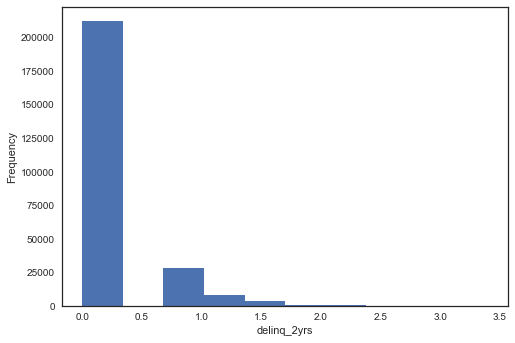

inq_last_6mths


(array([1.23762e+05, 0.00000e+00, 0.00000e+00, 7.27350e+04, 0.00000e+00,
        3.47680e+04, 1.60590e+04, 3.69200e+03, 1.89100e+03, 6.40000e+01]),
 array([0.        , 0.21972246, 0.43944492, 0.65916737, 0.87888983,
        1.09861229, 1.31833475, 1.5380572 , 1.75777966, 1.97750212,
        2.19722458]),
 <a list of 10 Patch objects>)

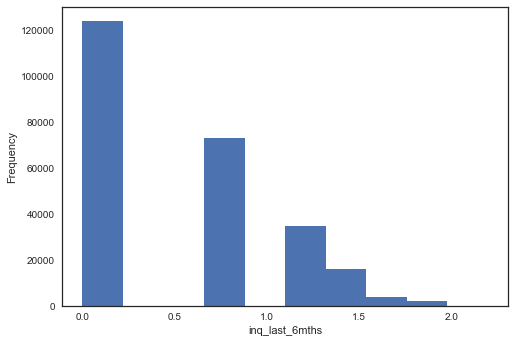

mths_since_last_delinq


(array([1.41418e+05, 6.32000e+02, 1.90400e+03, 4.59500e+03, 9.90100e+03,
        1.58040e+04, 2.28990e+04, 3.13860e+04, 2.43660e+04, 6.60000e+01]),
 array([0.        , 0.50304379, 1.00608758, 1.50913138, 2.01217517,
        2.51521896, 3.01826275, 3.52130654, 4.02435034, 4.52739413,
        5.03043792]),
 <a list of 10 Patch objects>)

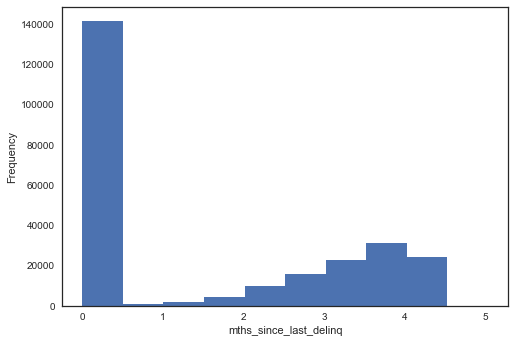

open_acc


(array([5.00000e+00, 4.60000e+01, 1.22200e+03, 1.11330e+04, 5.13740e+04,
        1.10135e+05, 6.45740e+04, 1.38260e+04, 6.40000e+02, 1.60000e+01]),
 array([0.        , 0.43438054, 0.86876108, 1.30314163, 1.73752217,
        2.17190271, 2.60628325, 3.0406638 , 3.47504434, 3.90942488,
        4.34380542]),
 <a list of 10 Patch objects>)

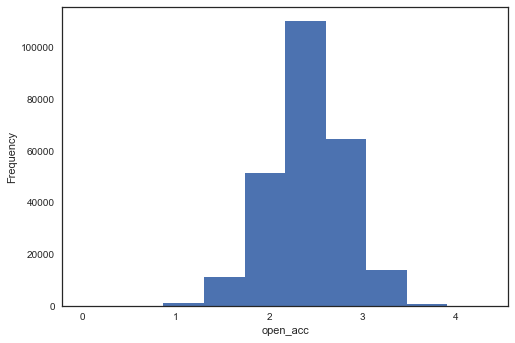

pub_rec


(array([2.22043e+05, 0.00000e+00, 2.73320e+04, 2.54700e+03, 0.00000e+00,
        8.78000e+02, 9.20000e+01, 6.60000e+01, 1.10000e+01, 2.00000e+00]),
 array([0.        , 0.27725887, 0.55451774, 0.83177662, 1.10903549,
        1.38629436, 1.66355323, 1.94081211, 2.21807098, 2.49532985,
        2.77258872]),
 <a list of 10 Patch objects>)

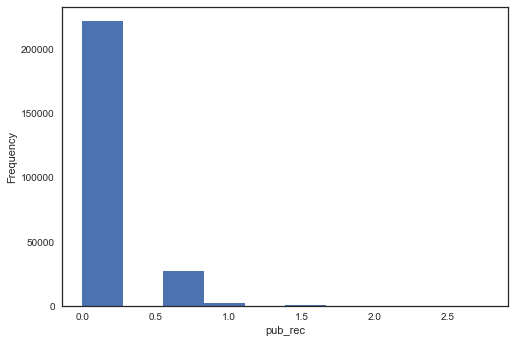

revol_bal


(array([1.83200e+03, 1.94000e+02, 4.85000e+02, 1.67400e+03, 7.21200e+03,
        4.76800e+04, 1.49572e+05, 4.27530e+04, 1.53800e+03, 3.10000e+01]),
 array([ 0.        ,  1.43732486,  2.87464972,  4.31197458,  5.74929943,
         7.18662429,  8.62394915, 10.06127401, 11.49859887, 12.93592373,
        14.37324858]),
 <a list of 10 Patch objects>)

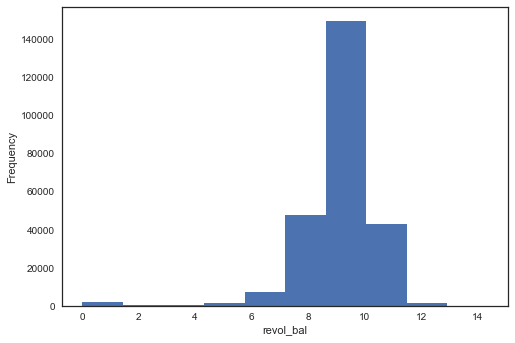

revol_util


(array([2.92500e+03, 1.76500e+03, 3.71500e+03, 9.02100e+03, 2.68640e+04,
        8.97890e+04, 1.18876e+05, 1.50000e+01, 0.00000e+00, 1.00000e+00]),
 array([0.        , 0.67949225, 1.35898449, 2.03847674, 2.71796899,
        3.39746124, 4.07695348, 4.75644573, 5.43593798, 6.11543022,
        6.79492247]),
 <a list of 10 Patch objects>)

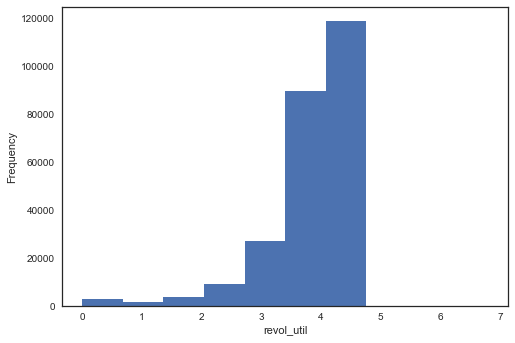

total_acc


(array([3.2000e+02, 2.4330e+03, 8.5810e+03, 2.8851e+04, 5.9790e+04,
        8.1225e+04, 5.6875e+04, 1.4462e+04, 4.2700e+02, 7.0000e+00]),
 array([1.09861229, 1.49047904, 1.8823458 , 2.27421255, 2.66607931,
        3.05794606, 3.44981282, 3.84167957, 4.23354633, 4.62541308,
        5.01727984]),
 <a list of 10 Patch objects>)

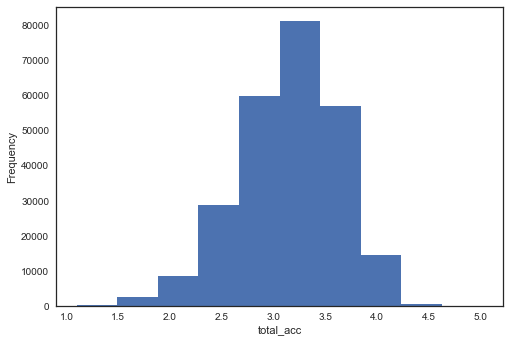

total_pymnt


(array([2.03000e+02, 0.00000e+00, 3.00000e+00, 3.50000e+01, 2.83000e+02,
        1.68100e+03, 1.08150e+04, 5.08920e+04, 1.29523e+05, 5.95360e+04]),
 array([ 0.        ,  1.09643734,  2.19287468,  3.28931202,  4.38574936,
         5.4821867 ,  6.57862404,  7.67506138,  8.77149872,  9.86793606,
        10.9643734 ]),
 <a list of 10 Patch objects>)

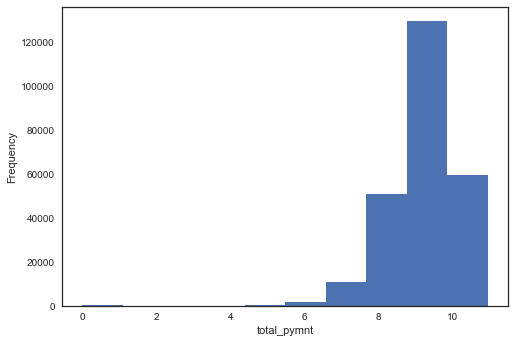

total_rec_late_fee


(array([2.46443e+05, 6.00000e+00, 4.00000e+00, 6.00000e+00, 2.91300e+03,
        2.03500e+03, 1.19800e+03, 3.08000e+02, 5.30000e+01, 5.00000e+00]),
 array([0.        , 0.58852147, 1.17704295, 1.76556442, 2.3540859 ,
        2.94260737, 3.53112885, 4.11965032, 4.7081718 , 5.29669327,
        5.88521475]),
 <a list of 10 Patch objects>)

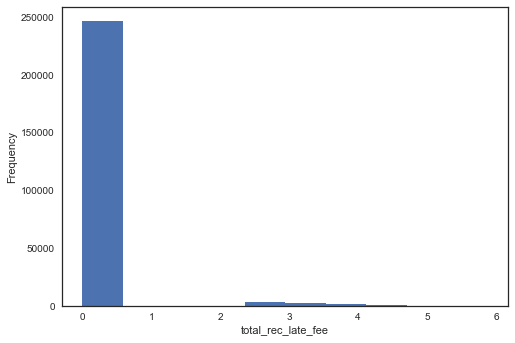

recoveries


(array([2.28784e+05, 4.00000e+00, 1.32700e+03, 4.89000e+02, 1.08800e+03,
        3.54200e+03, 7.66000e+03, 8.26800e+03, 1.71700e+03, 9.20000e+01]),
 array([ 0.        ,  1.04199354,  2.08398709,  3.12598063,  4.16797418,
         5.20996772,  6.25196127,  7.29395481,  8.33594835,  9.3779419 ,
        10.41993544]),
 <a list of 10 Patch objects>)

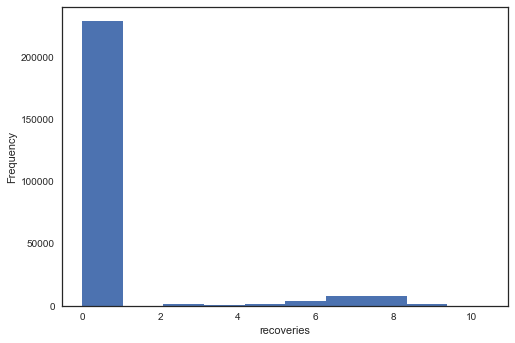

collections_12_mths_ex_med


(array([2.51397e+05, 0.00000e+00, 0.00000e+00, 1.46600e+03, 0.00000e+00,
        9.60000e+01, 0.00000e+00, 8.00000e+00, 2.00000e+00, 2.00000e+00]),
 array([0.        , 0.19459101, 0.38918203, 0.58377304, 0.77836406,
        0.97295507, 1.16754609, 1.3621371 , 1.55672812, 1.75131913,
        1.94591015]),
 <a list of 10 Patch objects>)

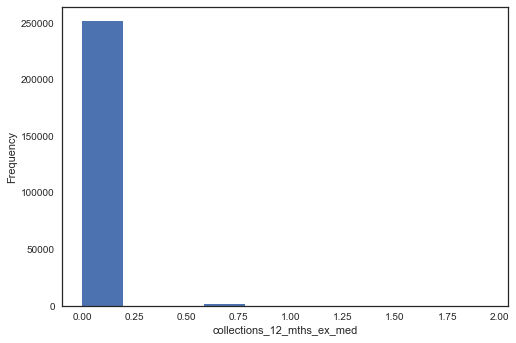

tot_coll_amt


(array([2.31266e+05, 9.00000e+00, 5.52900e+03, 8.95900e+03, 5.31100e+03,
        1.56700e+03, 3.20000e+02, 9.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0.        ,  1.60295426,  3.20590853,  4.80886279,  6.41181706,
         8.01477132,  9.61772559, 11.22067985, 12.82363412, 14.42658838,
        16.02954265]),
 <a list of 10 Patch objects>)

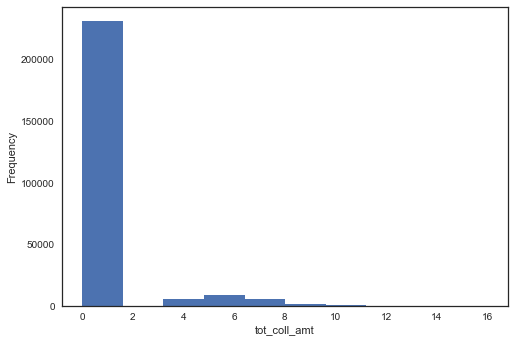

n_term


(array([196658.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  56313.]),
 array([3.61091791, 3.66091351, 3.7109091 , 3.7609047 , 3.81090029,
        3.86089589, 3.91089148, 3.96088708, 4.01088267, 4.06087827,
        4.11087386]),
 <a list of 10 Patch objects>)

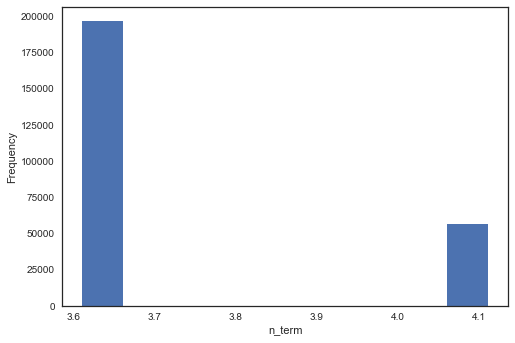

In [111]:
for col in numeric_col_names:
    print(col)
    plt.hist(np.log(1+df[col]), bins = 10)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    #save plots for later use
    plot_type = "log_Frequency_"
    plot_name = str(col)
    data_file_ext = ".png"
    plt_file_2_save = data_dir + plot_type + plot_name + data_file_ext
    plt.savefig(plt_file_2_save)
    
    #plt.title("Frequency distribution of ",col)
    plt.show()

<font face="verdana"> 
    
  
  ### Observations and next steps:
  
  All of the attributes are non-linear. We should consider log transformation or higer order terms.
  

## Revist Correlation Map

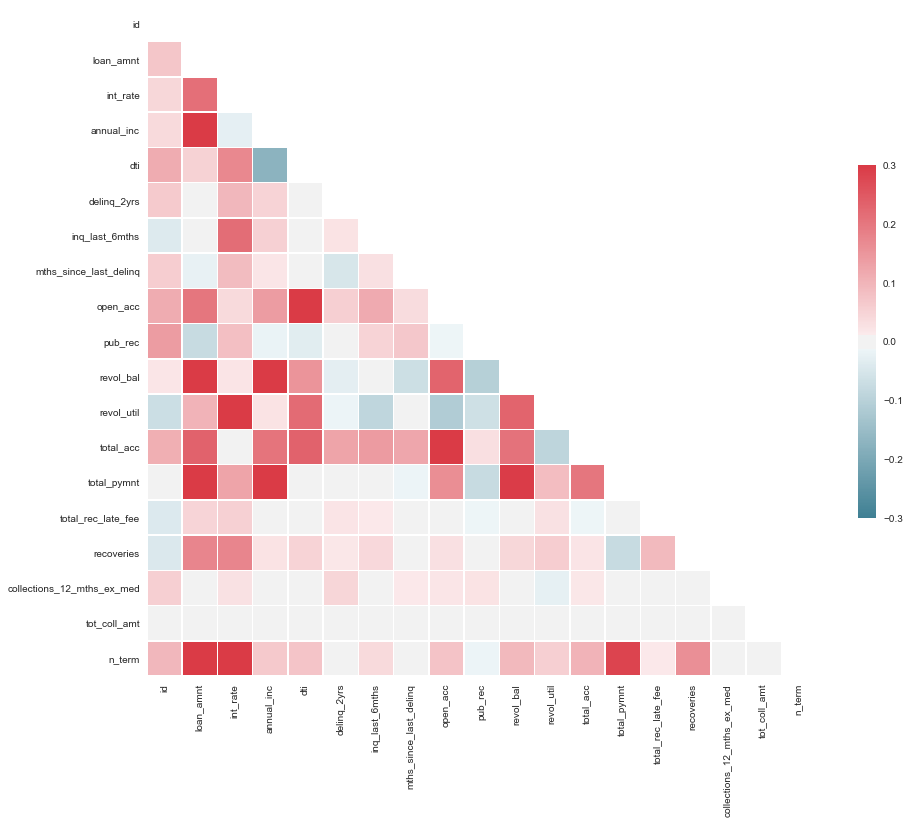

In [112]:
# Compute the correlation matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#save plots for later use
plot_type = "final_dataset_Correlation_"
plot_name = "Matrix"
data_file_ext = ".png"
plt_file_2_save = data_dir + plot_type + plot_name + data_file_ext
plt.savefig(plt_file_2_save)
    
plt.show()

In [39]:
df.shape

(887379, 35)

<font face="verdana"> 
    <br>
    <br>
    Cells in red are highly correlated columns. We can drop columns which are highly correlated with loan_amt, like number of terms, revol_bal, annual_inc.
    
    
### Scatter plots for all features

In [ ]:
pd.scatter_matrix(df, figsize=(23, 23))
#save plots for later use
plot_type = "scatter_"
plot_name = "Matrix"
data_file_ext = ".png"
plt_file_2_save = data_dir + plot_type + plot_name + data_file_ext
plt.savefig(plt_file_2_save)
    
plt.show()

In [44]:
df.to_csv('clean_data_for_cluster.csv', index = False)

<font face="verdana"> 
    
### Analysis of categorical variables

In [114]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(col, df[col].unique())

term ['36 months' '60 months']
grade ['B' 'C' 'A' 'E' 'F' 'D' 'G']
sub_grade ['B2' 'C4' 'C5' 'C1' 'A4' 'E1' 'F2' 'B5' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F1' 'E5' 'G4'
 'E2' 'G2' 'G1' 'F5' 'F4' 'G5' 'G3']
emp_title ['Others' 'Ryder' 'AIR RESOURCES BOARD' ...
 'Asst. General Superintendent ' 'Gunnery Sgt Instructor'
 'Coordinator of RSVP']
emp_length ['10+ years' '< 1 year' '3 years' '9 years' '4 years' '5 years' '1 year'
 '6 years' '2 years' '7 years' '8 years' '0 years']
home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status ['Verified' 'Source Verified' 'Not Verified']
loan_status ['Fully Paid' 'Charged Off']
pymnt_plan ['n' 'y']
purpose ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
addr_state ['AZ' 'GA' 'IL' 'CA' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA' 'MN' 'NJ'
 'OR'

In [116]:
categorical_cols = categorical_cols.drop(['sub_grade','emp_title','last_pymnt_d','initial_list_status','earliest_cr_line_year'])

In [117]:

for col in categorical_cols:
    print(col, df[col].unique())

term ['36 months' '60 months']
grade ['B' 'C' 'A' 'E' 'F' 'D' 'G']
emp_length ['10+ years' '< 1 year' '3 years' '9 years' '4 years' '5 years' '1 year'
 '6 years' '2 years' '7 years' '8 years' '0 years']
home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status ['Verified' 'Source Verified' 'Not Verified']
loan_status ['Fully Paid' 'Charged Off']
pymnt_plan ['n' 'y']
purpose ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
addr_state ['AZ' 'GA' 'IL' 'CA' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA' 'MN' 'NJ'
 'OR' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'NV' 'AK' 'CO' 'MD'
 'WV' 'VT' 'MI' 'DC' 'SD' 'NC' 'AR' 'NM' 'KS' 'HI' 'OK' 'MT' 'WY' 'NH'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME' 'ND']
application_type ['INDIVIDUAL' 'JOINT']


<font face="verdana"> 
    
#### The following are the categorical variables in our dataset. For each of these categories, we will plot number records by its unique category

In [118]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

<font face="verdana"> 
  
  ### Observations and next steps:
<br>Categorical columns look clean. We will proceed to plot each categorical variables.

For each categorical variable, sliced by output variable <b>loan status</b>, we will plot count of records.

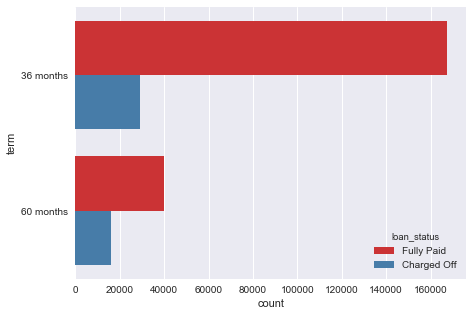

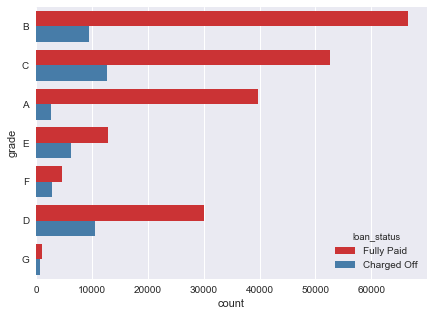

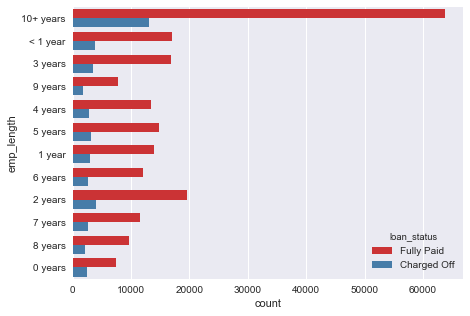

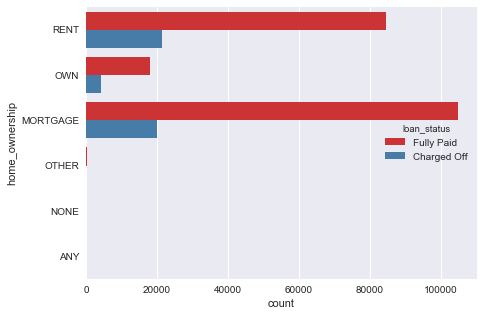

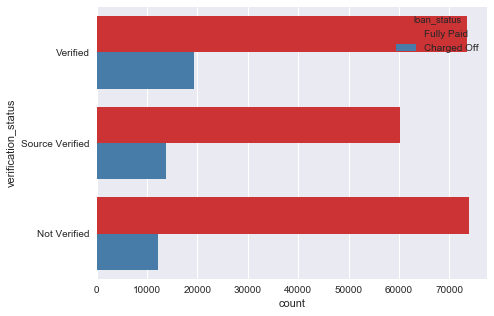

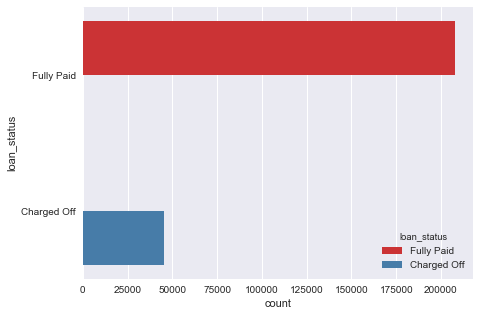

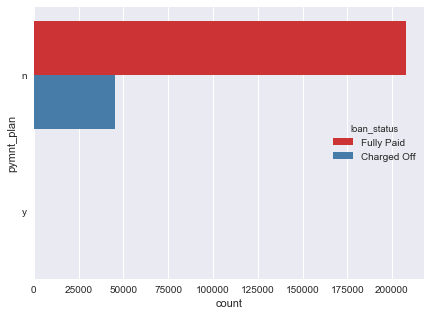

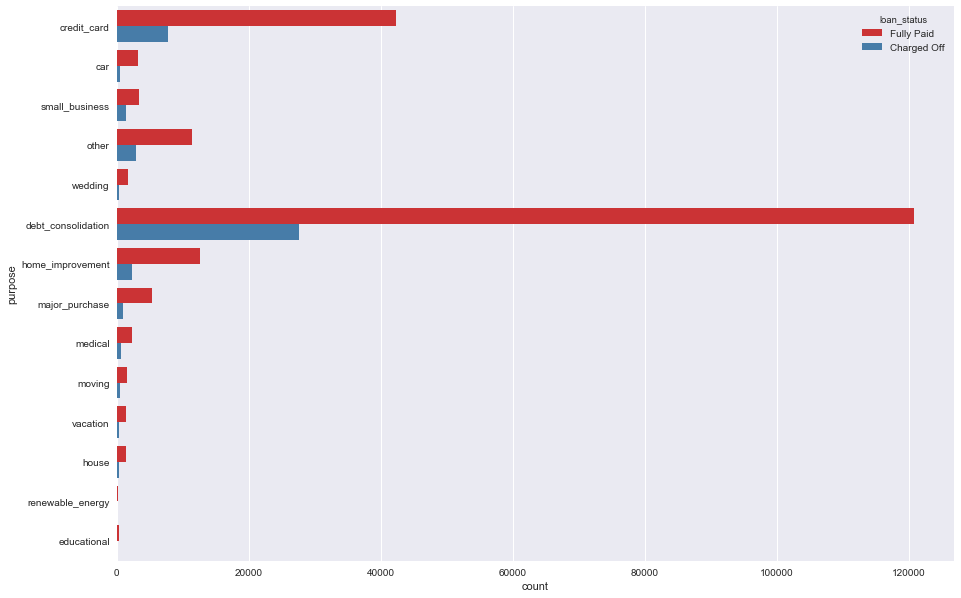

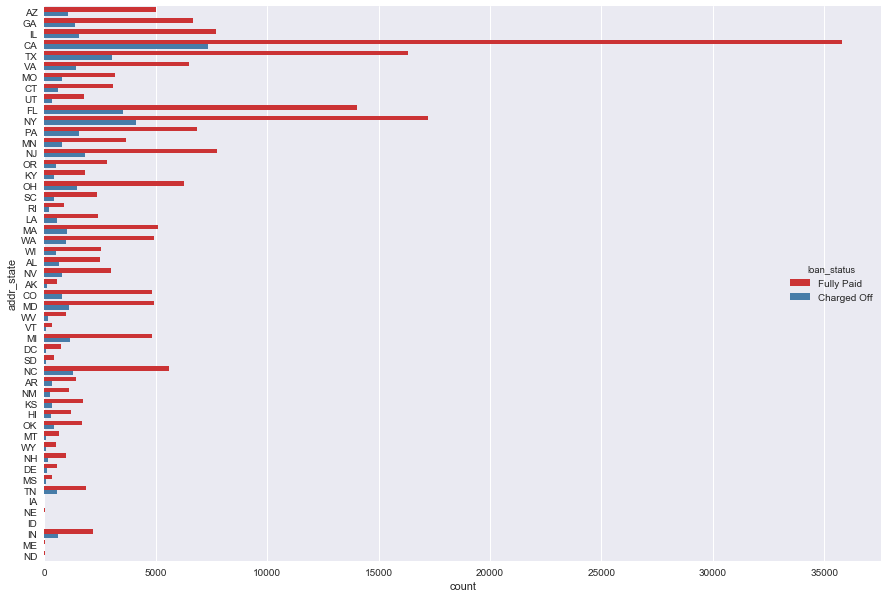

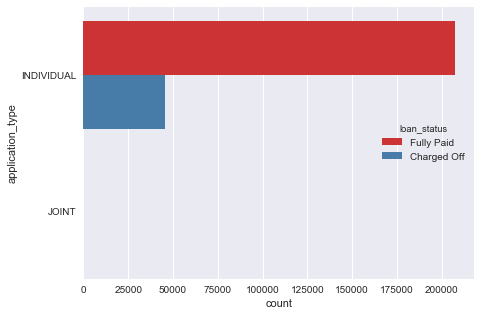

In [120]:
for col in categorical_cols:
    if col == 'addr_state' or col == 'purpose':
        sns.set(rc={'figure.figsize':(15,10.2)})
    else:
        sns.set(rc={'figure.figsize':(7,5)})
    sns.countplot(y=col,data=df,palette='Set1',hue="loan_status")
    
    #save plots for later use
    plot_type = "Count_of_"
    plot_name = str(col)
    data_file_ext = ".png"
    plt_file_2_save = data_dir + plot_type + plot_name + data_file_ext
    plt.savefig(plt_file_2_save)
    
    plt.show()

<font face="verdana"> 
    
#### Observations: 
<br> 1. Data for charged off is much less than fully paid.
<br> 2. Most purpose of the loan is for debt consolidation or credit card, while wedding, renewable energy and education are least reasons to get take loan.
<br> 3. Number of loans in California is hightest, almost twice the next highest Florida.
<br> 4. There are fewer home owners to take a loan than those on Rent or having home loan.

<font face="verdana"> 

### Loan amount - In-depth analysis

Let us look at how loan amount is impacting other variables

#### Understanding violin plots:
1. At the stomach of the violin is the box plot that gives median value for that category.
2. The spread is the kernal density distribution, number of data values in that range. a peak can be understood as high concentration of data and narrow representa low number of data. 
3. overall violin gives the range of data in that category.


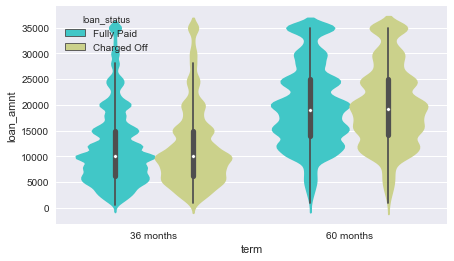

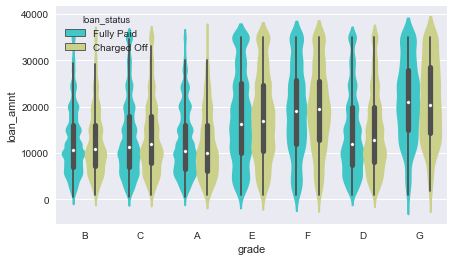

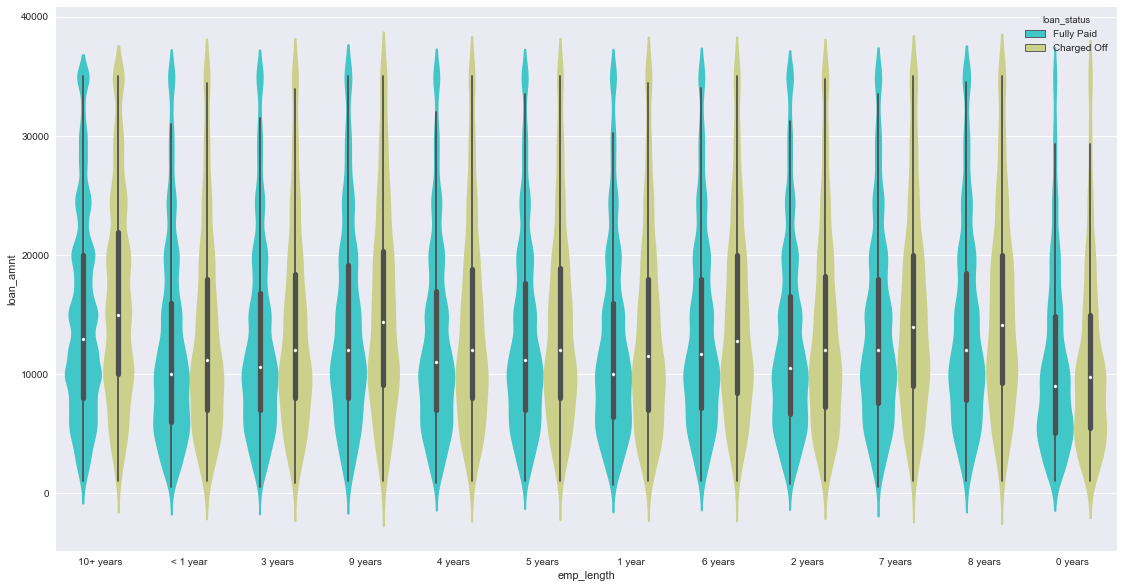

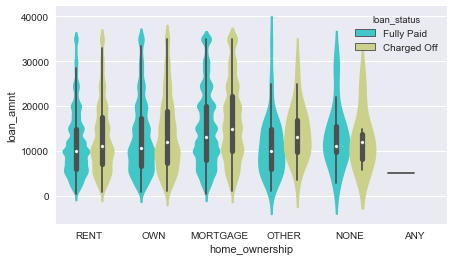

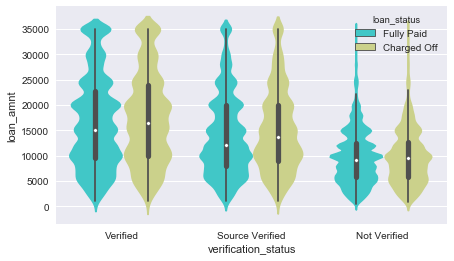

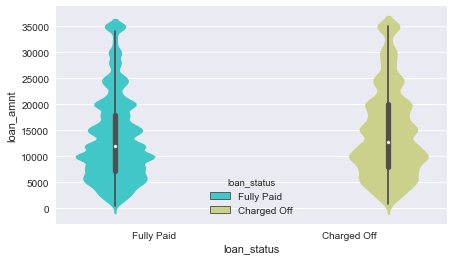

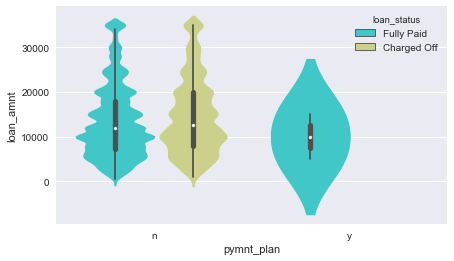

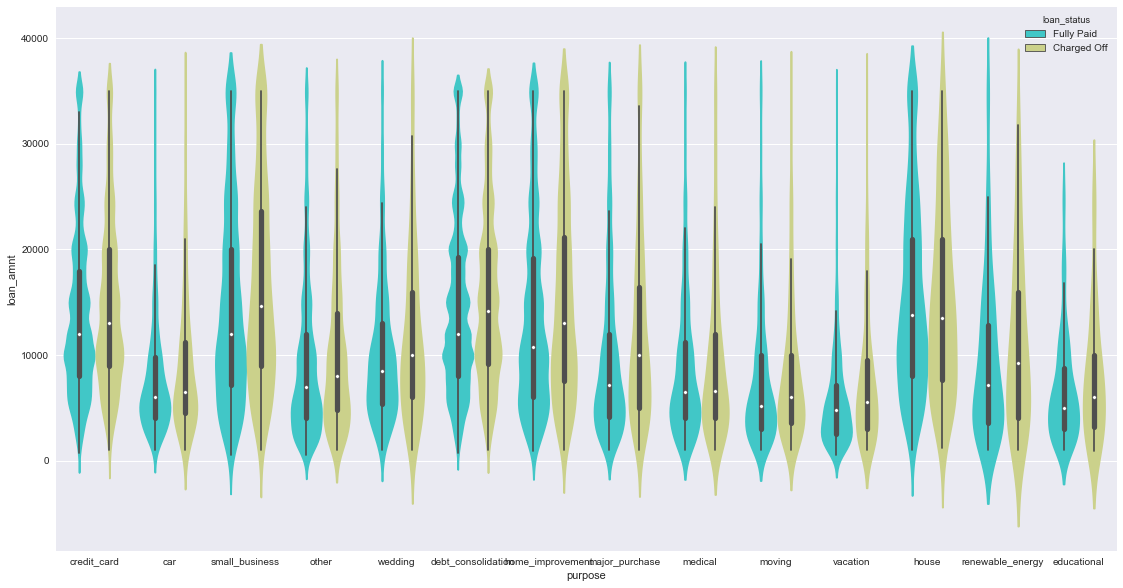

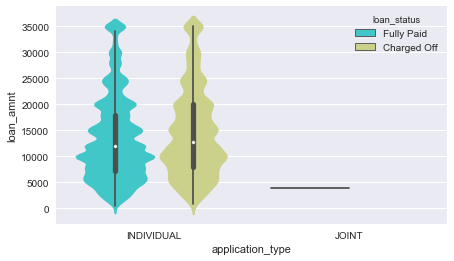

In [122]:
sns.set_style('whitegrid')
for col in categorical_cols:
    if col != 'addr_state': 
        if col == 'purpose'  or col == 'emp_length':
            sns.set(rc={'figure.figsize':(19,10)})
        else:
            sns.set(rc={'figure.figsize':(7,4)})
        sns.violinplot(x=col, y="loan_amnt", data=df,palette='rainbow',hue="loan_status")
        #sns.violinplot(x=col, y="loan_amnt", data=df,palette='rainbow')
        
        #save plots for later use
        plot_type = "Violin_"
        plot_name = str(col)
        data_file_ext = ".png"
        plt_file_2_save = data_dir + plot_type + plot_name + data_file_ext
        plt.savefig(plt_file_2_save)
    
        plt.show()

<font face="verdana"> 
    
#### Observations: TODO

In [123]:
df_state = df[['loan_amnt', 'addr_state']]
loan_by_state = df_state.groupby(['addr_state']).sum()
loan_by_state.reset_index(inplace=True)
loan_by_state['loan_amnt'] = round((loan_by_state['loan_amnt'].astype(float))/1000000,0)
loan_by_state.head()

,addr_state,loan_amnt
0,AK,10.0
1,AL,42.0
2,AR,22.0
3,AZ,79.0
4,CA,586.0


In [124]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [133]:
data = dict(type='choropleth',
            colorscale = 'Portland',
            locations = loan_by_state['addr_state'], 
            #df_addr_state['addr_state'],
            z = loan_by_state['loan_amnt'],
            locationmode = 'USA-states',
            #text = loan_by_state['addr_state'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Million USD"}
            ) 
layout = dict(title = 'Distribution of Loan Amount by State',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )
choromap = go.Figure(data = [data],layout = layout)

In [134]:
init_notebook_mode(connected=True) 
iplot(choromap)

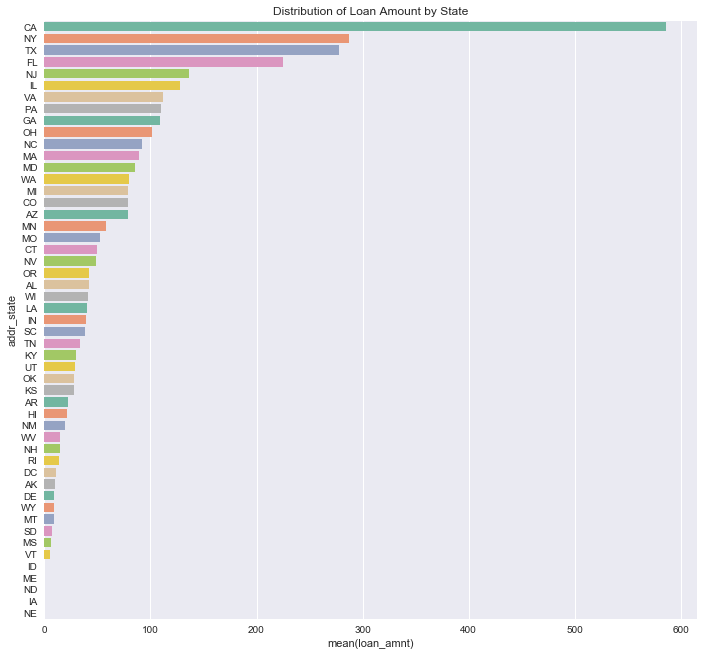

In [148]:
loan_by_state.sort_values(by=['loan_amnt'],ascending=False, inplace=True)
sns.set(rc={'figure.figsize':(11.7,11)})
sns.barplot(x="loan_amnt", y="addr_state", data=loan_by_state,palette='Set2')
plt.title("Distribution of Loan Amount by State")
#save plots for later use
plot_type = "Loan_amount_by_state_bar"
plot_name = str(col)
data_file_ext = ".png"
plt_file_2_save = data_dir + plot_type + plot_name + data_file_ext
plt.savefig(plt_file_2_save)
    
plt.show()

In [162]:
from IPython.display import Image
from IPython.display import HTML
html_content = "<Table>"
for col in numeric_col_names:

    plot_name = str(col)
    data_file_ext = ".png"

    image_loc = "plots/"
    l_plot_type = "Log_Frequency_"
    F_plot_type = "Frequency_"

    l_plt_file_2_save = image_loc + l_plot_type + plot_name + data_file_ext
    F_plt_file_2_save = image_loc + F_plot_type + plot_name + data_file_ext

    #Image(plt_file_2_save) 
    #Image(plt_file_2_save)
    
    #html_content = html_content + "<tr><td><img src="+ l_plt_file_2_save+"</td></tr>"
    html_content = html_content + "<tr><td><img src= '"+l_plt_file_2_save+"' </td><td><img src= '"+F_plt_file_2_save+"'</td></tr>"
    #print(html_content)

html_content = html_content + "</table>"
HTML(html_content)

<img src= 'plots/Log_Frequency_loan_amnt.png',<img src= 'plots/Frequency_loan_amnt.png'
<img src= 'plots/Log_Frequency_int_rate.png',<img src= 'plots/Frequency_int_rate.png'
<img src= 'plots/Log_Frequency_annual_inc.png',<img src= 'plots/Frequency_annual_inc.png'
<img src= 'plots/Log_Frequency_dti.png',<img src= 'plots/Frequency_dti.png'
<img src= 'plots/Log_Frequency_delinq_2yrs.png',<img src= 'plots/Frequency_delinq_2yrs.png'
<img src= 'plots/Log_Frequency_inq_last_6mths.png',<img src= 'plots/Frequency_inq_last_6mths.png'
<img src= 'plots/Log_Frequency_mths_since_last_delinq.png',<img src= 'plots/Frequency_mths_since_last_delinq.png'
<img src= 'plots/Log_Frequency_open_acc.png',<img src= 'plots/Frequency_open_acc.png'
<img src= 'plots/Log_Frequency_pub_rec.png',<img src= 'plots/Frequency_pub_rec.png'
<img src= 'plots/Log_Frequency_revol_bal.png',<img src= 'plots/Frequency_revol_bal.png'
<img src= 'plots/Log_Frequency_revol_util.png',<img src= 'plots/Frequency_revol_util.png'
